## Importing packages

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
stop_words=set(stopwords.words("english"))

In [5]:
import pandas as pd
import numpy as np

In [6]:
full_data = pd.read_csv("CSV as at 09 April 2020-Full database.csv")

In [7]:
full_data.head()

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags
0,COVID-19 causes more delay in managed care lau...,NaN,The state of Illinois is further delaying the ...,2020.0,NaN,Mental Health Weekly,30,12,8-8,NaN,10.1002/mhw.32288,12343,#11606,NaN,NaN,"* Opinion piece; Ethics, social science, econo..."
1,Daily Situation Report on Coronavirus disease ...,NaN,After detection of the first confirmed cases o...,2020.0,NaN,Arch Acad Emerg Med,NaN,NaN,NaN,32259119,NaN,50417,#45346,NaN,NaN,NaN
2,Daily Situation Report on Coronavirus disease ...,NaN,After detection of the first confirmed cases o...,2020.0,NaN,Arch Acad Emerg Med,NaN,NaN,NaN,32259120,NaN,50416,#45347,NaN,NaN,NaN
3,Daily Situation Report on Coronavirus disease ...,NaN,After detection of the first confirmed cases o...,2020.0,NaN,Arch Acad Emerg Med,NaN,NaN,NaN,32259121,NaN,50415,#45348,NaN,NaN,NaN
4,Daily Situation Report on Coronavirus disease ...,NaN,The main strategy of the Ministry of Health (M...,2020.0,NaN,Arch Acad Emerg Med,NaN,NaN,NaN,32259123,NaN,50414,#45349,NaN,NaN,NaN


In [8]:
title_data = full_data['Title']

In [13]:
title_data.head()

0    COVID-19 causes more delay in managed care lau...
1    Daily Situation Report on Coronavirus disease ...
2    Daily Situation Report on Coronavirus disease ...
3    Daily Situation Report on Coronavirus disease ...
4    Daily Situation Report on Coronavirus disease ...
Name: Title, dtype: object

In [42]:
title_data = title_data.astype('str')

In [43]:
len(title_data)

5362

In [9]:
abstract_data = full_data['Abstract']

In [14]:
abstract_data.head()

0    The state of Illinois is further delaying the ...
1    After detection of the first confirmed cases o...
2    After detection of the first confirmed cases o...
3    After detection of the first confirmed cases o...
4    The main strategy of the Ministry of Health (M...
Name: Abstract, dtype: object

## Word cloud for title

In [31]:
word_list = []

In [32]:
word_list

[]

In [44]:
for title in title_data[:]:
    x=word_tokenize(title)
    word_list.extend(x)

In [45]:
word_list[1]

'Situation'

In [46]:
len(word_list)

92041

In [23]:
from nltk.probability import FreqDist

In [47]:
fdist = FreqDist(word_list)

In [48]:
print(fdist)

<FreqDist with 9855 samples and 92041 outcomes>


In [49]:
fdist.most_common(5)

[('of', 4190), ('COVID-19', 3355), ('the', 2990), ('in', 2733), ('and', 2722)]

In [50]:
filtered_title_words = []

In [51]:
for word in word_list:
    if word not in stop_words:
        filtered_title_words.append(word)

In [52]:
new_fdist = FreqDist(filtered_title_words)

In [53]:
print(new_fdist)

<FreqDist with 9739 samples and 70363 outcomes>


In [78]:
new_fdist.most_common(20)

[('COVID-19', 3355),
 (':', 2590),
 (',', 1356),
 ('coronavirus', 1227),
 ('(', 1156),
 (')', 1156),
 ('Coronavirus', 955),
 ('2019', 875),
 ('novel', 614),
 ('SARS-CoV-2', 590),
 ('The', 579),
 ('A', 549),
 ('China', 527),
 ('?', 480),
 ('patients', 453),
 ('disease', 450),
 ('outbreak', 389),
 ('Disease', 386),
 ('infection', 384),
 ('pandemic', 379)]

In [79]:
puncs = [",", "\\", "/", "<", ".", ">", "(", ")", "[", "]", ":", ";", "?", "-", "A", "The", "An"]

In [80]:
punc_set = set(puncs)

In [81]:
new_stopwords = stop_words.union(punc_set)

In [82]:
naya_filtered_word_list = []

In [83]:
for word in word_list:
    if word not in new_stopwords:
        naya_filtered_word_list.append(word)

In [84]:
naya_fdist = FreqDist(naya_filtered_word_list)

In [85]:
print(naya_fdist)

<FreqDist with 9723 samples and 61637 outcomes>


In [92]:
naya_fdist.most_common(20)

[('COVID-19', 3355),
 ('coronavirus', 1227),
 ('Coronavirus', 955),
 ('2019', 875),
 ('novel', 614),
 ('SARS-CoV-2', 590),
 ('China', 527),
 ('patients', 453),
 ('disease', 450),
 ('outbreak', 389),
 ('Disease', 386),
 ('infection', 384),
 ('pandemic', 379),
 ('Covid-19', 373),
 ('Novel', 365),
 ('pneumonia', 329),
 ('2019-nCoV', 300),
 ('Pandemic', 284),
 ('de', 267),
 ('Clinical', 258)]

In [96]:
from nltk.stem import PorterStemmer

In [97]:
ps = PorterStemmer()

In [98]:
stemmed_list = [] 

In [99]:
for w in naya_filtered_word_list:
    stemmed_list.append(ps.stem(w))

In [105]:
stemmed_freq = FreqDist(stemmed_list)

In [106]:
stemmed_freq.most_common(20)

[('covid-19', 3807),
 ('coronaviru', 2196),
 ('novel', 982),
 ('diseas', 959),
 ('2019', 875),
 ('patient', 826),
 ('infect', 753),
 ('pandem', 680),
 ('sars-cov-2', 613),
 ('outbreak', 600),
 ('china', 536),
 ('clinic', 469),
 ('pneumonia', 450),
 ('case', 422),
 ('health', 401),
 ('epidem', 346),
 ('manag', 327),
 ('2019-ncov', 324),
 ('emerg', 295),
 ('care', 293)]

In [107]:
lower_case_list = []

In [109]:
for w in naya_filtered_word_list:
    lower_case_list.append(w.lower())

In [110]:
lower_freq = FreqDist(lower_case_list)

In [111]:
lower_freq.most_common(10)

[('covid-19', 3807),
 ('coronavirus', 2196),
 ('novel', 982),
 ('2019', 875),
 ('disease', 836),
 ('patients', 682),
 ('pandemic', 664),
 ('sars-cov-2', 613),
 ('outbreak', 552),
 ('china', 536)]

In [100]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [101]:
mast_lemmad_list = []

In [102]:
for w in stemmed_list:
    mast_lemmad_list.append(lem.lemmatize(w))

In [103]:
lemma_fdist = FreqDist(mast_lemmad_list)

In [104]:
lemma_fdist.most_common(20)

[('covid-19', 3807),
 ('coronaviru', 2196),
 ('novel', 982),
 ('diseas', 959),
 ('2019', 875),
 ('patient', 826),
 ('infect', 753),
 ('pandem', 680),
 ('sars-cov-2', 613),
 ('outbreak', 600),
 ('china', 536),
 ('clinic', 469),
 ('pneumonia', 450),
 ('case', 422),
 ('health', 401),
 ('epidem', 346),
 ('manag', 327),
 ('2019-ncov', 324),
 ('emerg', 295),
 ('care', 293)]

In [112]:
covid_common_names = ['covid-19', 'coronavirus', 'novel']

In [113]:
covid_less = []

In [114]:
for w in lower_case_list:
    if w not in covid_common_names:
        covid_less.append(w)

In [115]:
covid_less_freq = FreqDist(covid_less)

In [117]:
covid_less_freq.most_common(20)

[('2019', 875),
 ('disease', 836),
 ('patients', 682),
 ('pandemic', 664),
 ('sars-cov-2', 613),
 ('outbreak', 552),
 ('china', 536),
 ('infection', 531),
 ('pneumonia', 446),
 ('clinical', 443),
 ('health', 401),
 ('2019-ncov', 324),
 ('epidemic', 314),
 ('de', 287),
 ('care', 279),
 ('treatment', 271),
 ('management', 267),
 ('wuhan', 247),
 ('respiratory', 242),
 ('2020', 236)]

In [119]:
!pip install wordcloud

In [120]:
from wordcloud import WordCloud

In [123]:
lala = ' '.join(covid_less)

In [128]:
lala

"daily situation report disease iran march 14 2020 daily situation report disease iran march 15 2020 daily situation report disease iran march 16 2020 daily situation report disease iran march 17 2020 causes delay managed care launch illinois youth daily situation report disease iran march 14 2020 daily situation report disease iran march 15 2020 daily situation report disease iran march 16 2020 daily situation report disease iran march 17 2020 daily situation report disease iran march 22 2020 daily situation report disease iran march 23 2020 daily situation report disease iran march 25 2020 laboratory diagnosis emerging human infections state art nuclear medicine department prepared ventilation scans well ! letter disease 2019 more safety compact facts recommendantions action what should interventional radiologists know what can they do reply comments 'co-infection sars-cov-2 hiv patient wuhan city china ' mask possible key self-isolation pandemic back spring wuhan facts hope outbreak

In [127]:
from nltk.corpus import stopwords

In [129]:
wordcloud2 = WordCloud().generate(' '.join(covid_less))

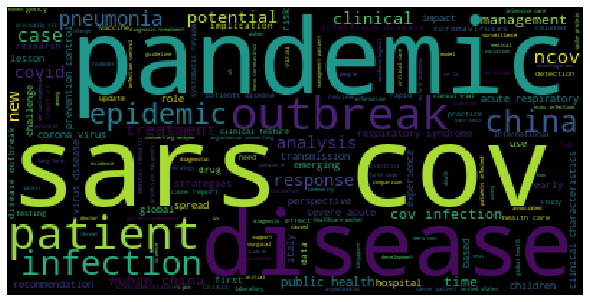

In [130]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [131]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      stopwords = stop_words,
                      min_font_size = 10).generate(lala) 

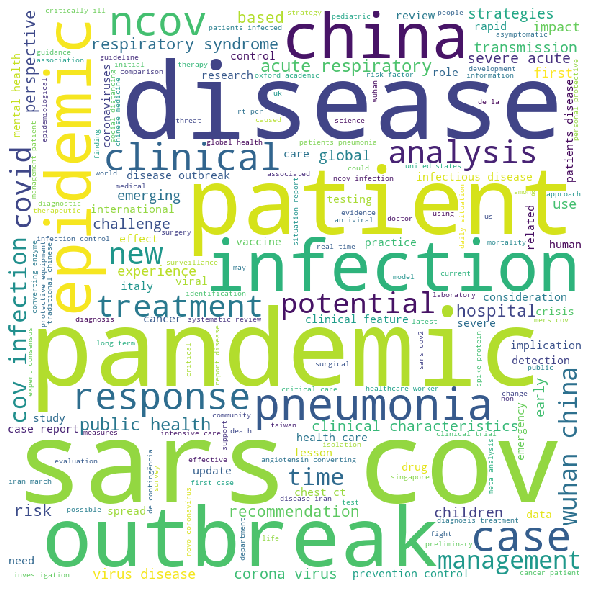

In [132]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(lala) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 